## Projeto

O projeto desde módulo será uma aplicação prática do conteúdo de visualização de dados no python.  
  
**Objetivo**  
Realizar um EDA (Exploratory Data Analysis) implementando gráficos para tornar o resultado visual. Lembre-se de explorar as bibliotecas estudadas neste módulo (Pandas, Matplotlib, Plotly, Seaborn)  
  
**Base de Dados**  
Cada grupo será responsável por buscar uma base de dados de seu interesse  
  
**Composição das duplas**  
As duplas estão descritas segundo o excel "Equipes" presente no google drive, na pasta "projeto"  
  
**Github**  
Na mesma planilha das duplas insiram o link para o github  
  
**Apresentação**  
A apresentação poderá ser construída no formato de preferência (jupyter notebook, power point..)  
  
**Tempo de apresentação**  
Cada grupo terá no máximo 10 minutos para apresentar o EDA  
  
**Avaliação**  
Para a avaliação serão considerados os seguintes pontos
1. Entendimento do contexto em que se encaixa a base de dados
2. Uso de todas bibliotecas apresentadas neste módulo para criação de gráficos (ao menos um gráfico de cada biblioteca)
3. Apresentação das características do conjunto de dados fornecido, destacando sua visão geral acerca do conjunto de dados e tecendo críticas e comentários
4. Uso dos diferentes tipos de gráficos com as variáveis numéricas e categóricas 
5. Identificação e discussão de missings ou outliers na base de dados
6. Outras análises que sejam pertinentes 
  
**Data de apresentação**  
08/06/2022  
  
**Obs. 1**: Não esqueçam de considerar se as informações são públicas  
**Obs. 2**: Não esqueçam de se divertirem fazendo isso! :D  
  
**BOM TRABALHO!**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

df_avc= pd.read_csv('C:/Users/mariliada/Desktop/LETS_CODE/trabalho/healthcare-dataset-stroke-data.csv', sep = ',')
df_avc.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [2]:
df_avc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
df_avc.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
px.pie(df_avc, 'gender')

In [123]:
px.pie(df_avc, 'stroke')

In [101]:
px.scatter(data_frame = df_avc, y = 'bmi', x='age', color = 'ever_married')

In [37]:
#df_avc_sum = df_avc.pivot_table(index = 'gender', values = 'stroke', aggfunc = 'sum').reset_index()
#px.bar(data_frame = df_avc_sum, x='gender', y='stroke')

#df_avc_sum = df_avc.pivot_table(index='age', values='stroke', columns='gender', aggfunc='sum')

df_avc_sum = df_avc.pivot_table(index = 'age', values = 'stroke', aggfunc = 'sum', columns = 'gender')
px.line(df_avc_sum, facet_row='gender', markers=True)

#fig.update_layout(
#    xaxis_title="Age",
#    yaxis_title="Strokes",
#    legend_title="Gênero",
#    title={
#        'text': 'Strokes por idade',
#        'font_color': 'grey'
#    })
#fig.show()

In [131]:
df_age = df_avc['age'] > 60
df_age_filtered = df_avc[df_age]
px.pie(df_age_filtered, 'stroke')

In [41]:
df_avc_status = df_avc.pivot_table(index = 'smoking_status', values = 'stroke', aggfunc = 'sum', columns = 'gender')
px.bar(df_avc_status)
#Residence_type
#smoking_status	

In [51]:
px.histogram(df_avc, 'avg_glucose_level', color = 'work_type')

In [52]:
px.box(df_avc, 'bmi')

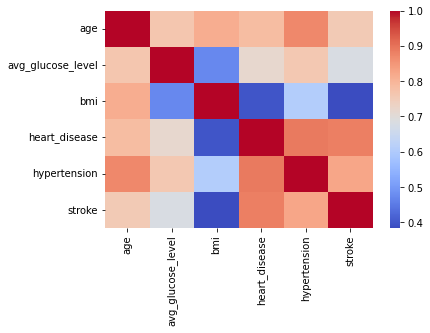

In [116]:
df_avc_agg1 = df_avc.pivot_table(index = ['age'], values = ['avg_glucose_level','bmi'], aggfunc = 'mean').reset_index() 
df_avc_agg1.head()

df_avc_agg2 = df_avc.pivot_table(index = ['age'], values = ['stroke', 'hypertension', 'heart_disease'], aggfunc = 'sum').reset_index()
df_avc_agg2.head()

df_avc_agg3 = df_avc_agg1.merge(df_avc_agg2, how = 'outer', on = 'age')
df_avc_agg3.head()
sns.heatmap(df_avc_agg3.corr(), cmap='coolwarm');

In [122]:
df_avc_agg_2 = df_avc.pivot_table(index = ['age','smoking_status'], values = ['hypertension'], aggfunc = 'sum').reset_index()

df_avc_agg_2.head()
px.scatter(data_frame = df_avc_agg_2, x = 'age', y='hypertension', color = 'smoking_status' ) 

In [85]:
'bmi','avg_glucose_level'



ValueError: DataFrame constructor not properly called!